## Risk Managing and Hedging Using Options

### Example 6.1 – Written European Call Option (Black-Scholes Pricing)

A bank sells a European call option to buy 100,000 shares of a non-dividend-paying stock for €600,000.

- Time now: $t = 6$ weeks  
- Maturity: $T = 20$ weeks  
- Risk-free rate: $r = 0.05$  
- Volatility: $\sigma = 0.20$  
- Current stock price: $S_t = 98$  
- Strike price: $K = 100$  
- Cost of carry: $b = r$ (non-dividend-paying stock)  



### Step 1: Compute $d_1$ and $d_2$

We use the Black-Scholes formula for European call options (with $b = r$):

- $d_1 = \frac{\ln(S_t / K) + (r + \frac{1}{2} \sigma^2) \tau}{\sigma \sqrt{\tau}}$  
- $d_2 = d_1 - \sigma \sqrt{\tau}$

Plug in values:

- $\ln(98 / 100) = \ln(0.98) \approx -0.0202$  
- $\sigma \sqrt{\tau} = 0.20 \times \sqrt{0.3846} \approx 0.1243$  
- $r + \frac{1}{2} \sigma^2 = 0.05 + 0.5 \times 0.04 = 0.07$  
- $0.07 \times 0.3846 \approx 0.0269$

So:

- $d_1 = \frac{-0.0202 + 0.0269}{0.1243} = \frac{0.0067}{0.1243} \approx 0.0539$  
- $d_2 = 0.0539 - 0.1243 = -0.0704$

### Step 2: Evaluate $N(d_1)$ and $N(d_2)$

Use standard normal CDF:

- $N(0.0539) \approx 0.5215$  
- $N(-0.0704) \approx 0.4719$


### Step 3: Apply the Black-Scholes formula

Since $b = r$, the general BSM call formula simplifies to:

$$
C = S_t N(d_1) - K e^{-r \tau} N(d_2)
$$

- $e^{-r \tau} = e^{-0.05 \times 0.3846} \approx 0.9810$  
- $C = 98 \cdot 0.5215 - 100 \cdot 0.9810 \cdot 0.4719$  
- $C \approx 51.11 - 46.31 = 4.80$ EUR per share


### Step 4: Total Option Value

- $100{,}000 \times 4.80 = €480{,}000$

Thus, the **bank receives €600,000** for selling the option, **about €120,000 above the theoretical price**, taking on risk of unlimited loss unless hedged.



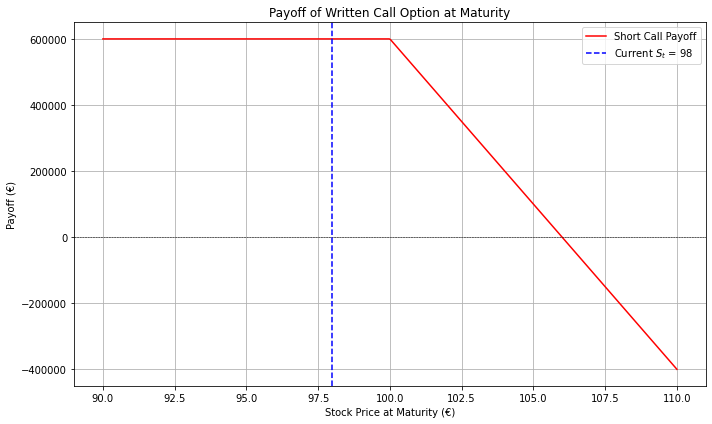

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
S = 98        # current stock price
K = 100       # strike price
r = 0.05      # risk-free rate
sigma = 0.20  # volatility
tau = 20 / 52  # time to maturity in years
n_shares = 100000
premium_received = 600000  # from selling the option

# Black-Scholes Formula
d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
d2 = d1 - sigma * np.sqrt(tau)

N_d1 = norm.cdf(d1)
N_d2 = norm.cdf(d2)

call_price = S * N_d1 - K * np.exp(-r * tau) * N_d2
total_option_value = call_price * n_shares

# Payoff diagram
S_range = np.linspace(90, 110, 500)
payoff_short_call = premium_received - np.maximum(S_range - K, 0) * n_shares

plt.figure(figsize=(10, 6))
plt.plot(S_range, payoff_short_call, label='Short Call Payoff', color='red')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(S, color='blue', linestyle='--', label=f'Current $S_t$ = {S}')
plt.title('Payoff of Written Call Option at Maturity')
plt.xlabel('Stock Price at Maturity (€)')
plt.ylabel('Payoff (€)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Covered Call Strategy – Example 6.1

Instead of taking a naked position, the bank can **hedge** by buying the underlying shares at the same time it sells the call. This is called a **covered call**.

- Number of shares: $100{,}000$
- Purchase price: $S_t = 98$ EUR  
- Total cost of stock: $100{,}000 \times 98 = €9{,}800{,}000$  
- Strike price: $K = 100$ EUR  
- Option sale revenue: €600,000  

#### Payoff at Maturity

If $S_T \leq 100$:
- The option is **not exercised**.
- The bank keeps the shares worth $S_T$ each.
- Total value: $100{,}000 \times S_T$

If $S_T > 100$:
- The option is exercised.
- The bank **must sell** the shares at €100 each.
- Total value: €10,000,000

In both cases, the **bank keeps the €600,000 premium**, so:

- For $S_T \leq 100$:  
  $\text{Payoff} = 100{,}000 \cdot S_T - 9{,}800{,}000 + 600{,}000 = 100{,}000 \cdot S_T - 9{,}200{,}000$

- For $S_T > 100$:  
  $\text{Payoff} = 10{,}000{,}000 - 9{,}800{,}000 + 600{,}000 = €800{,}000$


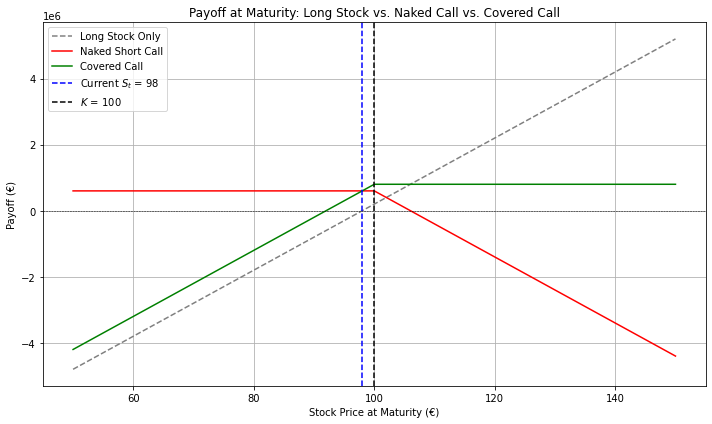

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
S = 98            # current stock price
K = 100           # strike price
n_shares = 100000
premium_received = 600000
stock_cost = S * n_shares

# Range of future stock prices
S_range = np.linspace(50, 150, 500)

# 1. Long Stock Only
payoff_stock_only = S_range * n_shares - stock_cost

# 2. Naked Short Call
payoff_naked_call = premium_received - np.maximum(S_range - K, 0) * n_shares

# 3. Covered Call = Long Stock + Short Call
payoff_covered_call = np.where(
    S_range <= K,
    payoff_stock_only + premium_received,
    K * n_shares - stock_cost + premium_received
)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(S_range, payoff_stock_only, label='Long Stock Only', linestyle='--', color='gray')
plt.plot(S_range, payoff_naked_call, label='Naked Short Call', color='red')
plt.plot(S_range, payoff_covered_call, label='Covered Call', color='green')

plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(S, color='blue', linestyle='--', label=f'Current $S_t$ = {S}')
plt.axvline(K, color='black', linestyle='--', label=f'$K$ = {K}')

plt.title('Payoff at Maturity: Long Stock vs. Naked Call vs. Covered Call')
plt.xlabel('Stock Price at Maturity (€)')
plt.ylabel('Payoff (€)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Delta Hedge – Example 6.2

A bank sells **2,000 European call options** on a stock.  
- Each call gives the right to buy **1 share** at a fixed strike.
- The **stock price is €100**, so the **notional exposure is €200,000**.
- The **option premium is €10**, so the bank collects **€20,000 total** in income.

Assume the **delta of the call is $\Delta = 0.4$**.

---

###  Delta Hedge Construction

- Delta tells us:  
  > For each €1 change in the stock price, the call's value changes by **€0.40**.

- The **total delta exposure** from the short call position is:  
  $$
  \Delta_{\text{total}} = 0.4 \times 2000 = 800
  $$

- This means:  
  > If the stock increases by €1, the value of the short call position **increases by €800**, i.e., a **loss of €800** for the bank.

---

###  To Hedge:

The bank **buys 800 shares** of the underlying stock.  
This offsets the €800 loss from the short call when the stock rises €1.

So:

- **Call value increases**: $+0.4 \times 2000 = +800$ → loss to the bank  
- **Stock value increases**: $+1 \times 800 = +800$ → gain from hedge  
- **Net change = 0** → this is a **perfect delta hedge**

---

###  Summary:

- Delta hedge = offsetting option exposure by holding $\Delta \times N$ shares  
- Makes portfolio **locally immune to small moves** in the underlying  
- Needs to be **rebalanced** as delta changes over time or with price


###  Long vs. Short Delta – What It Means

- **Delta** measures sensitivity of an option's value to the stock price:  
  $$
  \Delta = \frac{\partial C}{\partial S}
  $$

####  Long Delta
You benefit when the stock **goes up**.

- Example: Long 2,000 calls, each with $\Delta = 0.4$
- Total position delta: $+0.4 \times 2000 = +800$
- If stock rises €1 → your position **gains €800**

####  Short Delta
You lose when the stock **goes up**.

- Example: Short 2,000 calls, each with $\Delta = 0.4$
- Total position delta: $-0.4 \times 2000 = -800$
- If stock rises €1 → your position **loses €800**

---

###  Why Hedge?

When you're **short delta**, you're exposed to **losses if the stock rises**.  
To neutralize this exposure:

- Buy shares: long the stock is **+1 delta per share**
- So buy 800 shares → position delta becomes **0**

---

###  Intuition

| Position        | Delta  | Stock ↑ by €1 → Option Value | Result           |
|----------------|--------|------------------------------|------------------|
| Long Call       | +0.4   | Increases                    | You gain         |
| Short Call      | –0.4   | Increases                    | You lose         |
| Long Put        | –0.4   | Decreases                    | You gain if stock falls |
| Long Stock      | +1.0   | Increases                    | You gain         |
| Short Stock     | –1.0   | Decreases                    | You gain if stock falls |

---

###  Summary:

- **Long delta = you're bullish** (you want the stock to rise)  
- **Short delta = you're bearish** (you want the stock to fall)  
- A **delta-neutral** hedge removes short-term exposure to price movements
